### Benefits over Torchvision

- Faster than Torchvision on every benchmark
- Has more support over tasks like segmentation and detection

In [2]:
import cv2
import albumentations as A
import numpy as np
from PIL import Image
import matplotlib.patches as patches
import random

### Utils

In [3]:
import random
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
import albumentations as A


def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)
    plt.show()


def plot_examples(images, bboxes=None):
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 5

    for i in range(1, len(images)):
        if bboxes is not None:
            img = visualize_bbox(images[i - 1], bboxes[i - 1], class_name="Elon")
        else:
            img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()


# From https://albumentations.ai/docs/examples/example_bboxes/
def visualize_bbox(img, bbox, class_name, color=(255, 0, 0), thickness=5):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = map(int, bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    return img

In [4]:
image = Image.open("images/elon.jpeg")
mask = Image.open("images/mask.jpeg")
mask2 = Image.open("images/second_mask.jpeg")

### Albumentations Transforms

In [6]:
transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT), # cv2.BORDER_CONSTANT else there is a refelction to fill the frame
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0),# to choose one of many choices of augmentations in a list
    ]
)

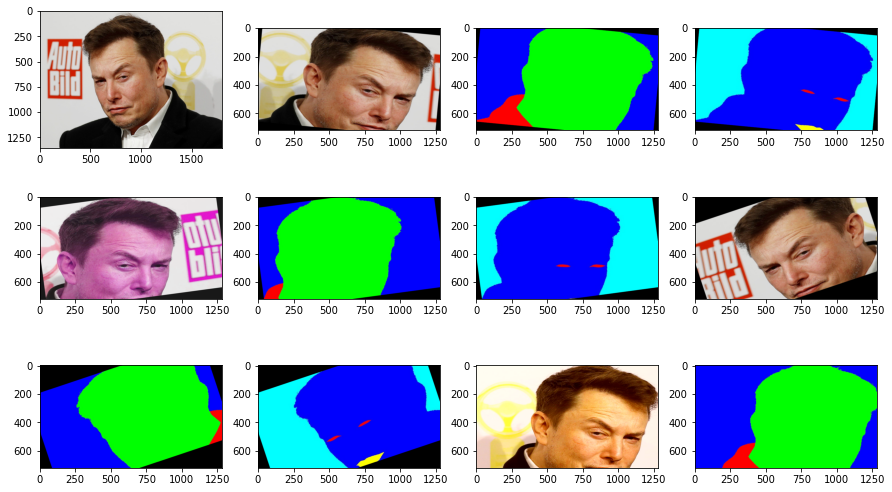

In [7]:
images_list = [image]
image = np.array(image)
mask = np.array(mask) # np.asarray(mask), np.array(mask)
mask2 = np.array(mask2)
for i in range(4):
    augmentations = transform(image=image, masks=[mask, mask2])
    augmented_img = augmentations["image"]
    augmented_masks = augmentations["masks"]
    images_list.append(augmented_img)
    images_list.append(augmented_masks[0])
    images_list.append(augmented_masks[1])
plot_examples(images_list)